In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Simple Linear Regression

## 1. Exploring the Data


Dummy dataset created to study simple linear regression. <br/>
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression
    
The file considered in this notebook corresponds to such a dataset only with the shuffled lines.

### 1.1. Importing the Dataset

In [ ]:
df = pd.read_csv('datasets/experience_salary_dataset.csv')

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.shape

### 1.2. Basic Information about the Dataset

In [ ]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

In [ ]:
df.columns=['Experience', 'Salary']
df

In [ ]:
print(f'O dataset possui {df.shape[0]} observações/linhas/samples/instâncias e {df.shape[1]} atributos/colunas/features/caracteristicas')

### 1.3. Descriptive Statistics

In [ ]:
df.describe()

In [ ]:
fig = plt.figure(figsize=(20, 12))

axis_1 = fig.add_subplot(2, 2, 1)
axis_1.set_title('Histogram of Experience (Years)')
axis_1.set_xlabel('Experience (Years)')
axis_1.set_ylabel('Frequence')
sns.histplot(data=df, x='Experience', ax=axis_1)

axis_2 = fig.add_subplot(2, 2, 2)
axis_2.set_title('Histogram of Annual Salary ($)')
axis_2.set_xlabel('Experience (Years)')
axis_2.set_ylabel('Frequence')
sns.histplot(data=df, x='Salary', ax=axis_2, color="yellow")

axis_3 = fig.add_subplot(2, 2, 3)
axis_3.set_title('Boxplot - Experience')
axis_3.set_ylabel('Experience (Years)')
sns.boxplot(data=df, y='Experience', orient='v', ax=axis_3)

axis_4 = fig.add_subplot(2, 2, 4)
axis_4.set_title('Boxplot - Salary ($)')
axis_4.set_ylabel('Salary (Annual)')
sns.boxplot(data=df, y='Salary', orient='v', color="yellow", ax=axis_4)

### 1.4 Correlation Matrix

The **correlation coefficient** measures the _linear association_ between two variables. Its value ranges from **_-1_** (perfect negative association) and **_+1_** (perfect positive association).
<img src="imgs/correlation_coefficient.png" width="70%" />

Source: https://dataz4s.com/statistics/correlation-coefficient/

In [ ]:
sns.scatterplot(data=df, x='Experience', y='Salary')

In [ ]:
df.corr()

## 2. Dependent Variable (y) vs Independent Variables

### `pairplot`

In [ ]:
sns.pairplot(data=df, aspect=3)

### `jointplot`

In [ ]:
sns.jointplot(data=df, x='Experience', y='Salary')

### `jointplot` with the estimated regression line

In [ ]:
sns.jointplot(data=df, x='Experience', y='Salary', kind='reg')

### `lmplot`
Plots the regression line between two variables together with their respective dispersions.

In [ ]:
sns.lmplot(data=df, x='Experience', y='Salary', aspect=3)

## 3. Estimating a Linear Regressor

### 3.1. Extracting the independent and dependent variables

In [ ]:
X = df[['Experience']]
X

#### Creating a DataFrame to store the independent/explanatory variables: Feature Matrix (X)
NB: we could use a numpy array instead.

In [ ]:
X_npy = X.values
X_npy

#### Creating a Series to store the dependent variable (y)

In [ ]:
y = df['Salary']
y

In [ ]:
y_npy = y.values
y_npy

### 3.2 Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) #42

#### Checking training and test set sizes

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg

In [ ]:
reg.fit(X_train, y_train) #fit - ajustar, no contexto de ML, significa treinar

In [ ]:
reg.intercept_

In [ ]:
reg.coef_

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = 24568.367141463837 + 9694.4074634 * x**

The predicted annual salary of an **inexperienced (zero years of experience)** employee is \\$24,568.36 (intercept $ \theta_0 $).

**For each additional year of experience**, the employee's annual salary increases by \\$9,694.4 (slope of the line - $ \theta_1 $).

## 3.4 Coefficient of determination (R²) of the linear model estimated with the Training Set

The coefficient of determination (R²) is a summary measure that tells you _how well the regression line fits the data_. <br/>
The coefficient of determination (R²) measures how well a _statistical model_ predicts an _outcome_. The _outcome_ is represented by the _model’s dependent variable_. <br/>
It is a value (generally) between 0 and 1.

It represents the _proportion of total variability_ of the $y$-value that is accounted for by the **independent variable $x$**.

Eg R² = 0.8234 means that the linear model explains 82.34% of the variance of the dependent variable from the regressors (independent variables) included in that linear model.

Broadly speaking:

| **Coefficient of determination (R²)** | **Interpretation**                            |
|---------------------------------------|-----------------------------------------------|
| 0                                     | The model **does not** predict the outcome.   |
| Between 0 and 1                       | The model **partially** predicts the outcome. |
| 1                                     | The model **perfectly** predicts the outcome. |

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

In [ ]:
print(f'R² = {}')

## 4. Predicting Salaries for Test Samples

### 4.1. Prediction

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
y_pred = reg.predict(X_test)
y_pred

In [ ]:
res = pd.DataFrame({
    'Experience': X_test['Experience'],
    'Salary (prediction)': y_pred.round(decimals=2),
    'Salary (true)': y_test.round(decimals=2),
    'Diferença residual': (y_test - y_pred).round(decimals=2),
    'Diferença absoluta': abs((y_test - y_pred).round(decimals=2))
})
res

The **residuals** inform how far the predictions are from the linear model.

In [ ]:
res.describe()

### 4.2. Visualizing the samples with the Linear Models

In [101]:
regression_line_x = X['Experience']
regression_line_y = reg.predict(X)
regression_line_y

array([107501.38558744,  75867.65397796, 110292.59720005,  82380.48107403,
       115875.02042525,  53537.96107714,  63772.40365668,  62841.99978582,
        56329.17268975,  56329.17268975,  47025.13398107,  81450.07720316,
        64702.80752755,  54468.36494801,  74006.84623622, 124248.65526306,
        40512.306885  ,  36790.69140153,  45164.32623934, 102849.36623311,
        60981.19204408, 114944.61655438,  38651.49914327,  63772.40365668,
        89823.71204097,  72146.03849449,  68424.42301102, 122387.84752132,
        92614.92365357, 100058.15462051])

C:\Users\aluno\.conda\envs\aulaML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aluno\.conda\envs\aulaML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aluno\.conda\envs\aulaML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aluno\.conda\envs\aulaML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

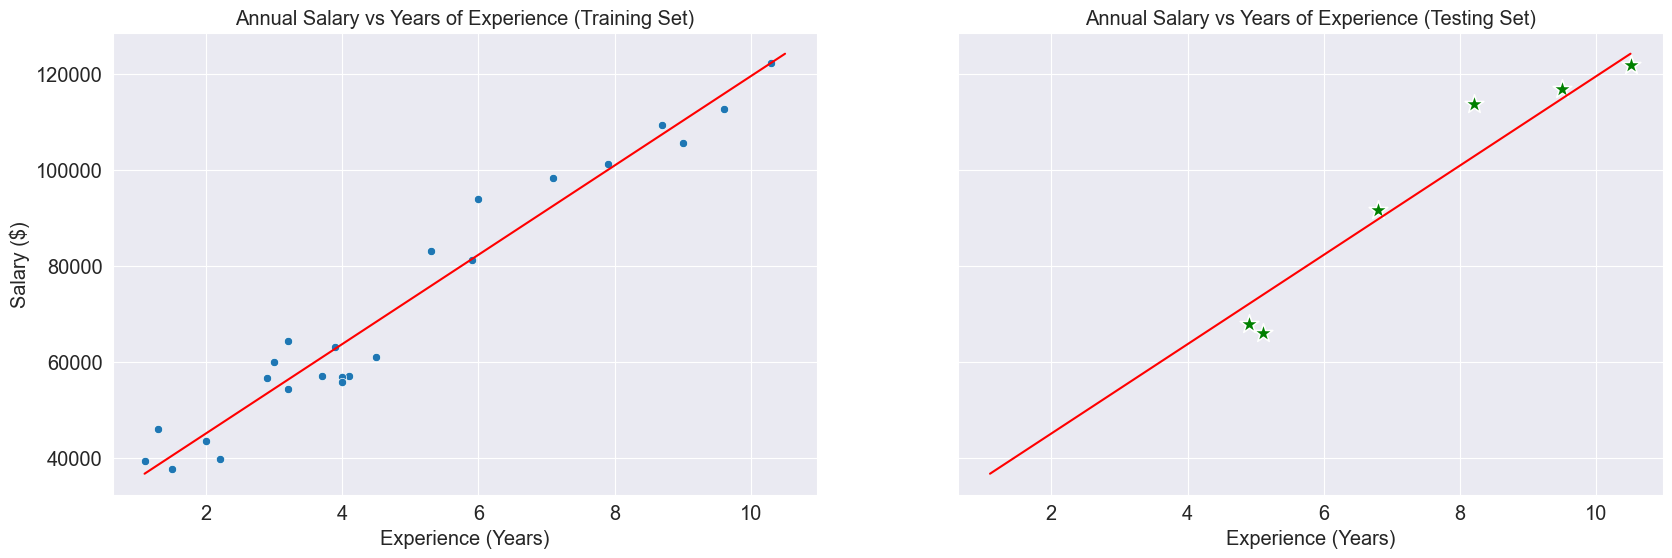

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Experience']
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train['Experience'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
axs[0].set_xlabel('Experience (Years)')
axs[0].set_ylabel('Salary ($)')

sns.scatterplot(x=X_test['Experience'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Annual Salary vs Years of Experience (Testing Set)')
axs[1].set_xlabel('Experience (Years)')
axs[1].set_ylabel('Salary ($)')

display()

In [103]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Experience,Label
0,8.7,Train
1,5.3,Train
2,9.0,Train
3,6.0,Train
4,9.6,Train
5,2.9,Train
6,4.0,Train
7,3.9,Train
8,3.2,Train
9,3.2,Train


C:\Users\aluno\.conda\envs\aulaML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aluno\.conda\envs\aulaML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Salary ($)')

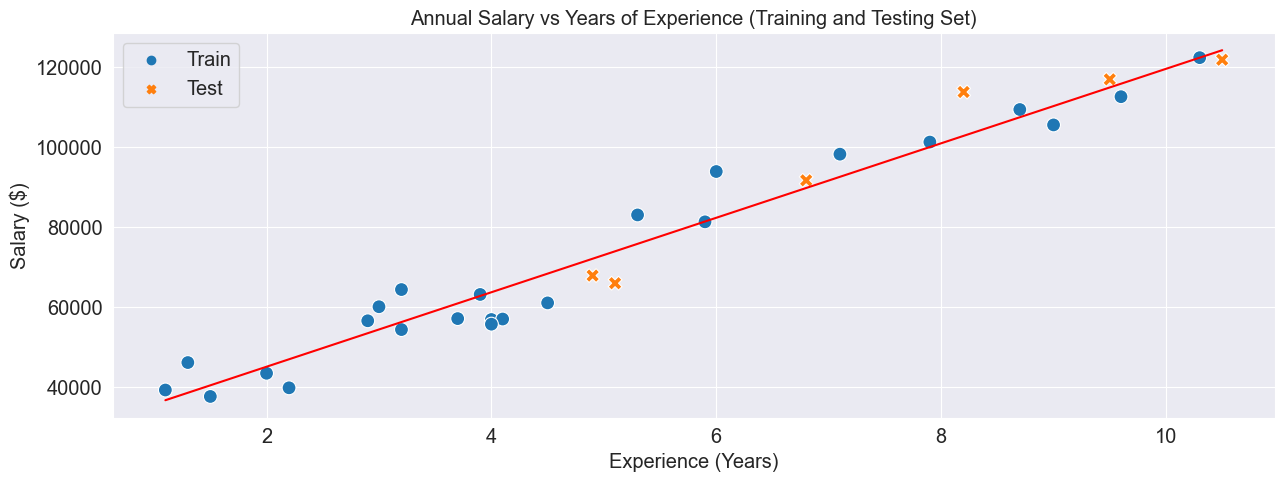

In [104]:
sns.scatterplot(data=X_labeled, x='Experience', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Annual Salary vs Years of Experience (Training and Testing Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

## 5. Computing Evaluation Metrics

How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

$$ MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)} - \hat{y}^{(i)}| $$

In [95]:
from sklearn.metrics import mean_absolute_error

In [97]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

4910.640860885028

### Mean Squared Error (MSE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 $$

Since the **errors** are squared before computing the _mean_, MSE weights **large errors** more than the MAE.

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
MSE = mean_squared_error(y_test, y_pred)
MSE

35824012.435220234

## Root Mean Squared Error (RMSE)
Square root of the MSE. <br/>
This is the metric commonly used to compare regression models.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [100]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

5985.316402264815

# Exercise

Consider the dataset below that contains **heights** (in inches/inches) and **weights** (in pounds/lbs) of fake people. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:
- Split the dataset into 80% for training and 20% for testing
- Compute the correlation between the training set variables
- Train a regression model considerint **height** as the independent variable and **weight** as the dependent one
   + Compute the model determination coefficient
   + Plot a scatterplot of the two variables containing the regression model (line)
- Predict the test set
   + Plot a scatterplot of the two variables containing the regression model (line)
   + Compute error metrics for regression